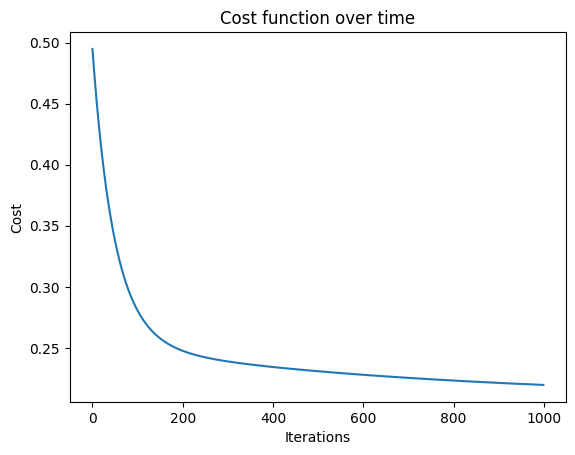

Mean squared error: 2.34


In [25]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
housing = fetch_california_housing()

# Split the data into training and testing sets
m = housing.data.shape[0]
m_train = int(m * 0.8)
m_test = m - m_train
X_train = housing.data[:m_train, :]
y_train = housing.target[:m_train]
X_test = housing.data[m_train:, :]
y_test = housing.target[m_train:]

# Scale the data
scaler = StandardScaler()
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler.transform(y_test.reshape(-1, 1)).flatten()

# Add bias term to feature matrices
X_train_scaled = np.concatenate((np.ones((m_train, 1)), X_train_scaled), axis=1)
X_test_scaled = np.concatenate((np.ones((m_test, 1)), X_test_scaled), axis=1)

def compute_cost(X, y, theta, lambda_reg):
    m = y.size
    h = X.dot(theta)
    J = 1 / (2 * m) * (h - y).T.dot(h - y) + lambda_reg / (2 * m) * np.sum(np.square(theta[1:]))
    return J

def gradient_descent(X, y, theta, alpha, num_iters, lambda_reg):
    m = y.size
    J_history = np.zeros(num_iters)

    for i in range(num_iters):
        h = X.dot(theta)
        theta -= alpha * (1 / m * (X.T.dot(h - y)) + lambda_reg / m * np.concatenate(([0], theta[1:])))
        J_history[i] = compute_cost(X, y, theta, lambda_reg)

    return theta, J_history

# Set hyperparameters and initialize weights
alpha = 0.01
num_iters = 1000
lambda_reg = 0.1
n = X_train_scaled.shape[1] - 1
theta = np.zeros(n + 1)

# Train the model
theta, J_history = gradient_descent(X_train_scaled, y_train_scaled, theta, alpha, num_iters, lambda_reg)

# Plot the cost function
plt.plot(J_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function over time')
plt.show()

# Make predictions on the testing set
y_pred_scaled = (X_test_scaled.dot(theta)).reshape((-1,1))
y_pred = scaler.inverse_transform(y_pred_scaled)

# Compute the mean squared error on the testing set
mse = np.mean((y_test - y_pred) ** 2)
print('Mean squared error: {:.2f}'.format(mse))
